In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
class WinCondition:
    def __init__(self):
        self.win_player = "X"

    def check_win(self):


        layers = self.check_all_layers()
        z_check = self.check_all_z()
        diag = self.check_cross_diagonals() or self.check_all_vertical_diagonals()

        return diag or z_check or layers



    def check_all_layers(self):
        return any(self.check_layer(z) for z in range(4))

    def check_all_z(self):
        return any(self.check_z(x, y) for x in range(4) for y in range(4))

    def check_all_vertical_diagonals(self):

        xdiag = any(self.check_vertical_xdiagonals(x) for x in range(4))
        ydiag = any(self.check_vertical_ydiagonals(y) for y in range(4))

        return xdiag or ydiag


    def check_layer(self, z):
        x_checker = any(self.check_x(y, z) for y in range(4))
        y_checker = any(self.check_y(x, z) for x in range(4))
        diag_checker = self.check_diagonals(z)

        return x_checker or y_checker or diag_checker


    def check_cross_diagonals(self):
        first = all(self.board[c][c][c] == self.win_player for c in range(4))
        second = all(self.board[c][3-c][3-c] == self.win_player for c in range(4))
        third = all(self.board[c][c][3-c] == self.win_player for c in range(4))
        fourth = all(self.board[c][3-c][c] == self.win_player for c in range(4))



        return first or second or third or fourth

    def check_x(self, y, z):
        return all(self.board[x][y][z] == self.win_player for x in range(4))


    def check_y(self, x, z):
        return all(self.board[x][y][z] == self.win_player for y in range(4))



    def check_diagonals(self, z):
        if all(self.board[diag][diag][z] == self.win_player for diag in range(4)):
            return True

        if all(self.board[3-reverse_diag][reverse_diag][z] == self.win_player for reverse_diag in range(4)):
            return True

        return False

    def check_z(self, x, y):
        return all(self.board[x][y][z] == self.win_player for z in range(4))



    def check_vertical_xdiagonals(self, x):
        if all(self.board[x][diag][diag] == self.win_player for diag in range(4)):
            return True

        if all(self.board[x][reverse_diag][3-reverse_diag] == self.win_player for reverse_diag in range(4)):
            return True

        return False


    def check_vertical_ydiagonals(self, y):
        if all(self.board[diag][y][diag] == self.win_player for diag in range(4)):
            return True

        if all(self.board[reverse_diag][y][3-reverse_diag] == self.win_player for reverse_diag in range(4)):
            return True

        return False


In [3]:
class TicTacToe4x4x4(WinCondition):
    def __init__(self, render_mode="computer"):
        # 3D board: 4 layers of 4x4 grids
        super().__init__()
        self.board = [[[" " for _ in range(4)] for _ in range(4)] for _ in range(4)]
        self.current_player = "X"
        self.players = ["X", "O"]
        self.terminated = False
        self.winner = " "
        self.render_mode = render_mode

    def check_draw(self):
        # Check for any empty space in the entire 3D board
        return not any(
            " " in self.board[x][y][z] for x in range(4) for y in range(4) for z in range(4)
        )

    def get_action_space(self):
        action_space = []
        for x in range(4):
            for y in range(4):
                for z in range(4):
                    if self.board[x][y][z] == " ":
                        action_space.append(self.get_position(x, y, z))

        action_space.sort()
        return action_space

    def print_board(self):
        # Prints each layer of the 3D board
        for layer in range(4):
            print(f"Layer {layer + 1}:")
            print("┌───┬───┬───┬───┐")
            for i, row in enumerate(self.board[layer]):
                print("│ " + " │ ".join(row) + " │")
                if i < 3:
                    print("├───┼───┼───┼───┤")
            print("└───┴───┴───┴───┘")
            if layer < 3:
                print()

    def create_visualization(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

        for x in range(4):
            for y in range(4):
                for z in range(4):
                    if self.board[x][y][z] == "X":
                        ax.scatter(x, y, z, color="r", marker="o")
                    if self.board[x][y][z] == "O":
                        ax.scatter(x, y, z, color="b", marker="o")

        cmin = 0
        cmax = 3

        ax.set_xticks(np.arange(cmin, cmax + 1, 1))
        ax.set_yticks(np.arange(cmin, cmax + 1, 1))
        ax.set_zticks(np.arange(cmin, cmax + 1, 1))

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        if self.winner != " ":
            plt.title(f"Player {self.winner} Won!")
        else:
            plt.title(f"Player {self.current_player} Turn" )

        plt.show()

    def change_player(self):
        if self.current_player == "X":
            self.current_player = "O"
        else:
            self.current_player = "X"

    def get_coordinates(self, position):
        x = int((position % 16) % 4)
        y = int((position % 16) / 4)
        z = int(position / 16)

        return x, y, z

    def get_position(self, x, y, z):
        return z * 16 + y * 4 + x

    def update_board(self, x, y, z):
        reward = 0

        if self.terminated:
            return self.board, reward, self.terminated, self.current_player

        if self.board[x][y][z] == " ":
            self.board[x][y][z] = self.current_player
        else:
            self.terminated = True
            return self.board, reward, self.terminated, self.current_player


        self.win_player = self.current_player
        win = self.check_win()
        draw = self.check_draw()

        self.terminated = win or draw

        if win:
            if self.current_player == "X":
                reward = -1
                self.winner = "X"
            else:
                reward = 1
                self.winner = "O"
        elif draw:
            reward = 0

        self.change_player()

        return self.board, reward, self.terminated, self.current_player

    def step_coordinates(self, x, y, z):
        # Output: Observation, reward, terminated, player_turn
        observation, reward, terminated, player_turn = self.update_board(x, y, z)

        if self.render_mode == "human":
            self.create_visualization()

        return observation, reward, terminated, player_turn

    def step(self, position):

        # Output: Observation, reward, terminated, player_turn
        x, y, z = self.get_coordinates(position)
        observation, reward, terminated, player_turn = self.update_board(x, y, z)

        if self.render_mode == "human":
            self.create_visualization()

        return observation, reward, terminated, player_turn

In [4]:
env = TicTacToe4x4x4(render_mode="human")
# Render Mode as human would get you a visualization of your environment.

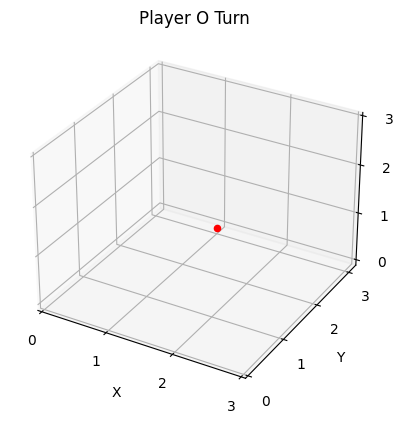

In [5]:
x = 1
y = 3
z = 0

position = env.get_position(x, y, z)
observation, reward, terminated, player_turn = env.step(position)

In [6]:
# Initialized as a random policy for player 1


def policy_player1(observation, action_space):
    position = random.choice(action_space)

    return position


# Initialized as a random policy for player 2
def policy_player2(observation, action_space):
    position = random.choice(action_space)

    return position


In [7]:
def play_one_game(policy_player1, policy_player2, render_mode="computer"):
    env = TicTacToe4x4x4(render_mode)

    terminated = 0
    observation = [[[" " for _ in range(4)] for _ in range(4)] for _ in range(4)]
    reward = 0
    player_turn = "X"

    while not terminated:

        action_space = env.get_action_space()

        if player_turn == "X":
            action = policy_player1(observation, action_space)
        else:
            action = policy_player2(observation, action_space)

        observation, reward, terminated, player_turn = env.step(action)




    return reward  # This is the player who won

In [8]:
play_one_game(policy_player1, policy_player2)

-1

I have completed the Tic Tac Toe 3D Game and also added some other functionality that helps speedy development.  

You can use any approach to solve this problem. Your solution will be used to compete against other players. Ofcourse you need to store the weights of the neural network / QTable in a separate file.  

You also have to write a function that takes in the observtion from env.step() and outputs an action.  

You will submit that file and a function that loads those weights and plays the game.  

## Neural Temporal Difference Learning

We will be training a neural network to approximate the value function (not the Q function). The network will learn an approximate function that can tell us the value of being in each state. The reason we choose the value function here instead of the Q function is due to simplicity. When utilising the value function, we do not need to worry about invalid actions, as the value will only be calculated for each possible next state (which corresponds to each possible action at the current step).

The objective of the neural network is to minimise the difference between the (predicted) value of the current state and the estimate of the value of the current state based on the (predicted) value of the next state.

The implementation is based on the paper: "Temporal Difference Learning for the Game Tic-Tac-Toe 3D: Applying Structure to Neural Networks" - van de Steeg et al. The details of each step will be discussed in the relevant section of the notebook.

### Imports

In [9]:
import torch
from copy import deepcopy

### Define the Neural Network

This neural network will serve as an approximation to the Value Function. The input is the state of the game and the output is the value of that state.

In [10]:
class ValueNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(64, 128) # 64 input size allows us to pass in the board state
        self.fc2 = torch.nn.Linear(128, 256)
        self.fc3 = torch.nn.Linear(256, 128)
        self.fc4 = torch.nn.Linear(128, 1) # only predicted the value of a single state

    def forward(self, x):
        x = torch.nn.functional.tanh(self.fc1(x))
        x = torch.nn.functional.tanh(self.fc2(x))
        x = torch.nn.functional.tanh(self.fc3(x))
        x = torch.nn.functional.tanh(self.fc4(x))

        return x

Initialising Model, Optimiser and Environment

In [11]:
model = ValueNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

env = TicTacToe4x4x4("computer")

### Converting States to Model Input

We take a 4x4x4 string array and we convert it to a flattened float input, which we can feed into the model.

In [12]:
def convert_observation(observation):
    # copy obs
    new_observation = deepcopy(observation)
    for x in range(4):
        for y in range(4):
            for z in range(4):
                if new_observation[x][y][z] == "X":
                    new_observation[x][y][z] = -1 # -1 is X
                elif new_observation[x][y][z] == "O":
                    new_observation[x][y][z] = 1 # 1 is O
                else:
                    new_observation[x][y][z] = 0 # 0 is None
    
    return torch.tensor(new_observation, dtype=torch.float32).flatten().unsqueeze(0)

### Defining NN-based Policy Function for Each Player

As in the paper, we will be maximising/minimising the value of the next state, according to the following equation:

$\pi (s) = argmax_s \sum_{s'} P(s,a,s') (R(s,a) + \gamma V^{\pi}(s'))$

or

$\pi (s) = argmin_s \sum_{s'} P(s,a,s') (R(s,a) + \gamma V^{\pi}(s'))$

So, we must choose a policy that gives us the action with the maximum/minimum possible value for the expression:

$\sum_{s'} P(s,a,s') (R(s,a) + \gamma V^{\pi}(s'))$

Since each action leads to a deterministic outcome in this game, the actual expression is:

$(R(s,a,s') + \gamma V^{\pi}(s'))$

where R(s, a, s') is the reward of being in or transitioning to state s' and $V^{\pi}(s')$ is the (predicted) value of being in the state s'. It is important to note that we define the terminal states as having no value and all non terminal states as having no reward. For simplicity, we will remove the gamma only for the policy selection step.

In [16]:
@torch.no_grad()
def policy_player1(observation, action_space, epsilon = 0):
    if not action_space:
        return None # Return nothing if no actions available
    
    rnd = random.random()
    if rnd < epsilon:
        return random.choice(action_space) #choose random action w prob epsilon
    else: 
        action_values = []
        for action in action_space:
            x, y, z = env.get_coordinates(action)
            new_observation = deepcopy(observation)
            new_observation[x][y][z] = "X" # next state create based on action

            new_env = TicTacToe4x4x4(render_mode="computer") # creating a new env to check for rewards
            new_env.board = new_observation

            if new_env.check_win():
                action_values.append(torch.tensor([-1], dtype=torch.float32).reshape((1, 1))) # -1 reward with 0 value
            elif new_env.check_draw():
                action_values.append(torch.tensor([0], dtype=torch.float32).reshape((1, 1))) # 0 reward with 0 value
            else:
                new_observation = convert_observation(new_observation)
                action_values.append(model(new_observation)) # 0 reward with predicted value

        action_values = torch.cat(action_values, dim=0)
        action_idx = torch.argmin(action_values).item()

        return action_space[action_idx]

@torch.no_grad()
def policy_player2(observation, action_space, epsilon = 0):
    if not action_space:
        return None # Return nothing if no actions available
    
    rnd = random.random()
    if rnd < epsilon:
        return random.choice(action_space) #choose random action w prob epsilon
    else: 
        action_values = []
        for action in action_space:
            x, y, z = env.get_coordinates(action)
            new_observation = deepcopy(observation)
            new_observation[x][y][z] = "O" # next state create based on action

            new_env = TicTacToe4x4x4(render_mode="computer") # creating a new env to check for rewards
            new_env.board = new_observation

            if new_env.check_win():
                action_values.append(torch.tensor([1], dtype=torch.float32).reshape((1, 1))) # 1 reward with 0 value
            elif new_env.check_draw():
                action_values.append(torch.tensor([0], dtype=torch.float32).reshape((1, 1))) # 0 reward with 0 value
            else:
                new_observation = convert_observation(new_observation)
                action_values.append(model(new_observation)) # 0 reward with predicted value

        action_values = torch.cat(action_values, dim=0)
        action_idx = torch.argmax(action_values).item()

        return action_space[action_idx]


Load Model if already trained

In [ ]:
state_dict = torch.load("model.pth")
model.load_state_dict(state_dict)

### Main Training Loop

As mentioned previously, our objective is to minimise the loss between the predicted value of the state and the value of the state based on the predicted value of the next state. We do this according to the equation:


$V^{new}(s_t) \leftarrow V(s_t) + \alpha (r_t + \gamma V(s_{t+1})- V(s_t))$

As the paper states, since a neural network has its own mechanism for handling the learning rate, we can set $\alpha=1$ to simplify the equation. We are left with:

$V^{new}(s_t) \leftarrow r_t + \gamma V(s_{t+1})$

We will attempt to train the neural network in an online fashion, while it plays against itself. When it's "X"s turn, the policy will try to minimise the value, as we define the reward function to be -1 when X wins. When it's "O"s turn, we want to maximise the value. In this way, the network can learn the value function approximation for the whole game as a whole instead of having to have multiple ones for each player. Note that we use epsilon-greedy exploration for the policy.

In [18]:
def train(num_episodes=100000, gamma=0.99, epsilon_decay=0.99999):
    epsilon = 1
    ep_loss = 0
    for episode in range(num_episodes):
        env = TicTacToe4x4x4("computer")
        terminated = 0
        observation = [[[" " for _ in range(4)] for _ in range(4)] for _ in range(4)] # initial board state
        reward = 0
        player_turn = "X"

        while not terminated: # one episode loop
            action_space = env.get_action_space() # get available actions

            # choose an action based on epsilon-greedy policy
            if player_turn == "X":
                action = policy_player1(observation, action_space, epsilon)
            else:
                action = policy_player2(observation, action_space, epsilon)

            # convert current observation (state) to tensor
            old_observation = convert_observation(deepcopy(observation))

            # take a step based on the chosen action
            observation, reward, terminated, player_turn = env.step(action)

            # convert the next state to a tensor as well
            new_observation = convert_observation(deepcopy(observation))

            if terminated: # if game has ended the new v value is simply the reward 
                vnew = torch.Tensor([reward]).reshape(1, 1)*gamma # discounting reward (just difference of convention)
            else:
                # get value of new observation
                vnext = model(new_observation)
                vnew = gamma*vnext

            # get value of old observation
            v = model(old_observation)

            # update value of old observation
            optimizer.zero_grad()
            loss = torch.nn.MSELoss()(v, vnew)
            loss.backward()
            optimizer.step()

            ep_loss += loss.item()
            steps += 1

        if epsilon > 0.1:
            epsilon *= epsilon_decay

        if episode % 1000 == 0 and episode != 0:
            print(f"Episode {episode} Loss {ep_loss}")
            print(f"Epsilon: {epsilon}")
            ep_loss = 0
            # save model
            torch.save(model.state_dict(), "model.pth")

train()


Episode 1000 Loss 1015.3905092840034
Epsilon: 0.9900398837485513
Episode 2000 Loss 1019.3218417180699
Epsilon: 0.9801887733005742
Episode 3000 Loss 1017.0145056100416
Epsilon: 0.9704356835269693
Episode 4000 Loss 995.2933235042976
Epsilon: 0.9607796391008754
Episode 5000 Loss 986.0873130326917
Epsilon: 0.9512196744001473
Episode 6000 Loss 975.3159365469204
Epsilon: 0.9417548334107899
Episode 7000 Loss 974.3551818200417
Epsilon: 0.9323841696313484
Episode 8000 Loss 960.1256666097352
Epsilon: 0.9231067459782678
Episode 9000 Loss 899.207018944516
Epsilon: 0.9139216346921732
Episode 10000 Loss 822.7403168312843
Epsilon: 0.9048279172450976
Episode 11000 Loss 837.1851707761316
Epsilon: 0.8958246842486228
Episode 12000 Loss 807.9960176394666
Epsilon: 0.8869110353629425
Episode 13000 Loss 845.532165257559
Epsilon: 0.8780860792068276
Episode 14000 Loss 794.7550749431088
Epsilon: 0.8693489332684792
Episode 15000 Loss 703.5319863278668
Epsilon: 0.8606987238172882
Episode 16000 Loss 736.7100853404

### Plots

Visualising the learning process

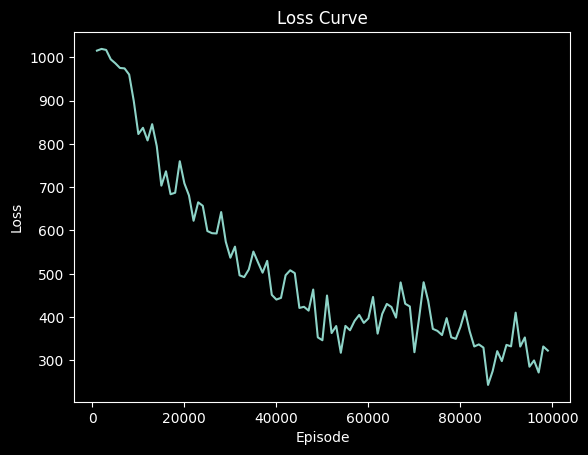

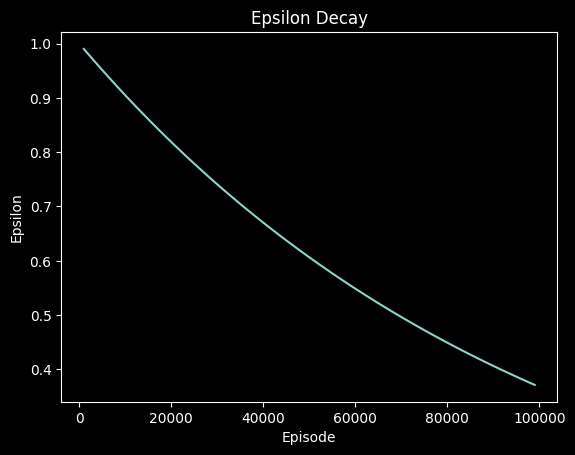

In [28]:
import matplotlib.pyplot as plt

data = open("trainstats.txt", "r")

episodes = []
loss = []
epsilon = []

# Parsing each line of the data
for line in data:
    # Splitting the line based on spaces
    parts = line.split()

    # Extracting the required values
    if parts[0] == "Episode":
        episode_number = int(parts[1])
        loss_value = float(parts[3])
        loss.append(loss_value)
        episodes.append(episode_number)
    else:
        epsilon_value = float(parts[-1])  # Epsilon is the last word in the line
        epsilon.append(epsilon_value)


plt.style.use('dark_background')

plt.plot(episodes, loss)
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

plt.plot(episodes, epsilon)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.title("Epsilon Decay")
plt.show()

Note: The loss is aggregated over 1000 episodes at each datapoint.

In [21]:
state_dict = torch.load("model_best.pth")
model.load_state_dict(state_dict)

<All keys matched successfully>

### Evaluation

In [22]:
def random_policy(observation, action_space):
    return random.choice(action_space)

print("Evaluating against Random Policy")

NUM_ITS = 100
wins = 0

for _ in range(NUM_ITS):
    if play_one_game(policy_player1=policy_player1, policy_player2=random_policy) == -1:
        wins+=1

print(f"Wins as X: {wins}")

NUM_ITS = 100
wins = 0

for _ in range(NUM_ITS):
    if play_one_game(policy_player1=random_policy, policy_player2=policy_player2) == 1:
        wins+=1

print(f"Wins as O: {wins}")

Evaluating against Random Policy
Wins as X: 99
Wins as O: 94


In [23]:
print("Evaluating against itself")

xwins = 0
owins = 0
draws = 0
NUM_ITS = 100

for _ in range(NUM_ITS):
    r = play_one_game(policy_player1=policy_player1, policy_player2=policy_player2)

    if r == -1:
        xwins += 1
    elif r == 1:
        owins += 1
    else:
        draws += 1

print(f"Number of; \nX wins: {xwins}\nO wins: {owins}\nDraws: {draws}")

Evaluating against itself
Number of; 
X wins: 100
O wins: 0
Draws: 0


### Performance

This last result seems a bit strange but since we know there is no randomness in our model, the better policy will always win when played against itself. The X policy is stronger as X goes first and thats why we can see it wins. Next, if it wins once, it will win 100% of the time as the same sequence will be played out for all 100 games.

We can see that our model performs very well against a random player. However, we can deduce that it is probably far from optimal due to the low amount of episodes for such an algorithm with such a large state space (100,000). Ideally, it would need to run for millions of episodes to get a good performance. Due to performance constraints, we will not train it for longer than this.

We can test the performance of the bot against the online version of the game.

#### Easy Difficulty

Our agent is X and the opponent is O. We can see that the agent won the game below. Manually playing games was difficult due to the notebook not printing states sometimes so we leave it at 1 game, with confidence that our agent is comfortably better than the easy bot.

In [ ]:
# Play a game manually against bot

def human_policy(observation, action_space):
    x = int(input("X: "))
    y = int(input("Y: "))
    z = int(input("Z: "))

    return z * 16 + y * 4 + x

play_one_game(policy_player1=policy_player1, policy_player2=human_policy, render_mode="human")

Layer 1:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 2:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │ X │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 3:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 4:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘


Layer 1:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │ O │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 2:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │ X │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 3:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 4:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘
Layer 1:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │ O │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 2:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │ X │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │ 

-1

#### Difficult Difficulty

Unfortunately, this is the end of the road for our fairly naaive agent. It lost here to a very simple strategy. This is likely due to the fact that it has not been trained for long enough. For such an approach, as mentioned before, we would require millions of episodes to get a good performance. This is simply not feasible for this project. This could also be improved by implementing specific actions in certain states, such as to block the opponent from winning.

In [ ]:
# Play a game manually against bot

def human_policy(observation, action_space):
    x = int(input("X: "))
    y = int(input("Y: "))
    z = int(input("Z: "))

    return z * 16 + y * 4 + x

play_one_game(policy_player1=policy_player1, policy_player2=human_policy, render_mode="human")

Layer 1:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 2:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │ X │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 3:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 4:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘


Layer 1:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │ O │   │   │
└───┴───┴───┴───┘

Layer 2:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │ X │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 3:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘

Layer 4:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
└───┴───┴───┴───┘
Layer 1:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │   │   │
├───┼───┼───┼───┤
│   │ O │   │   │
└───┴───┴───┴───┘

Layer 2:
┌───┬───┬───┬───┐
│   │   │   │   │
├───┼───┼───┼───┤
│   │   │ X │   │
├───┼───┼───┼───┤
│   │   │ X │   │
├───┼───┼───┼───┤
│   │ 

1

That concludes the experiment. It is worth noting that the agent may not win every game against the easy bot, but it seems to be able to win in limited testing, and it is the opposite for the difficult bot. This is likely due to the fact that the states encountered while playing against the difficult bot are more confusing for the agent, due to limited training episodes. Furthermore, the easy bot is less likely to try to win the game or block the agent, allowing the agent to win more often.

In conclusion, for the game 3d Tic Tac Toe, with limited compute power and time, this agent seems to be lackluster compared to what can be achieved with more traditional methods such as truncated lookahead trees and simple rule-based agents. However, it is a worthwhile proof of concept, as well as a good baseline for rule based agents to build on top of. (Eg when a rule based agent is unsure of what to do, it can use the value function to help it decide)